## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 데이터 다운로드 (특별할인 판매)

In [6]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/logistic-regression/special-sales.csv')
print(df.head())

         date weekday  busy_day  high_temperature  special_sales
0  2002-08-05     Mon         0                28              1
1  2002-08-06     Tue         0                24              0
2  2002-08-07     Wed         1                26              0
3  2002-08-08     Thu         0                24              0
4  2002-08-09     Fri         0                23              0


## Input, Feature 설정

In [3]:
Label = df['special_sales']
InputFeature = df[['busy_day','high_temperature']]

## matplot library를 활용한 point plot

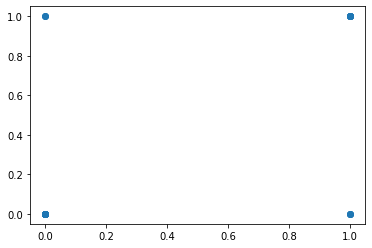

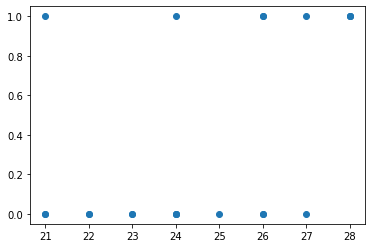

In [4]:
plt.plot(InputFeature['busy_day'], Label, 'o')
plt.show()

plt.plot(InputFeature['high_temperature'], Label, 'o')
plt.show()

## Linear regression 모델 fitting

In [4]:
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(Label, InputFeature)
model = model.fit()
print(results.params)

NameError: name 'InputFeature' is not defined

## 통계모델 분석하기

In [ ]:
print( model.summary() )

<h2>Logistic regression 모델 해석하기</h2>
Coefficient: ln ( odds ) = 2.4426 * busy_day + 0.5545 * high_temperature + const<br>
<br>
odds를 알기 위해서는 exponential을 해주어야한다. (log 없애기)<br>

In [ ]:
np.exp(model.params).round(4)

<h3>p.value</h3>
busy_day는 0.05보다 작음, 즉 coef가 0보다 크다는 뜻. 유의한 변수<br>
High temperature는 p-value가 0.067로 근소하게 유의하지 않음.<br>
하지만 0.1보다 작기에 이를 border라고도 표현함<br>
비록 유의하지는 않지만, 어느정도 영향이 있을 것으로 짐작 가능<br>

In [ ]:
df[['busy_day','high_temperature']]



## 결과 출력 (0 ~ 1 값, 즉 sigmoid 값)

In [ ]:
model.predict(InputFeature).head()

In [ ]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

In [ ]:
plt.plot(model.predict(InputFeature), df['high_temperature'], 'o')
plt.show()


Logistic regression을 활용하여, 폐암 환자의 재발을 예측하는 연구를 각자 진행해볼거에요.
다만, 예측은 하되, 모델을 꼭 해석할 수 있어야 합니다.
1. Logistic regression 모델을 Train 데이터에 학습한다.
2. 변수에서 중요한 변수들에 대해서 설명하고, Odds ratio를 구한다.
3. 필요없는 변수를 제외한 Feature를 구성한다.
4. 최종 모델을 만든다.
5. Validation data에 적용하여 예측한다.

### 연습문제

Logistic regression을 활용하여, 폐암 환자의 재발을 예측하는 연구를 각자 진행해볼거에요.
다만, 예측은 하되, 모델을 꼭 해석할 수 있어야 합니다.
1. Logistic regression 모델을 Train 데이터에 학습한다.
2. 변수에서 중요한 변수들에 대해서 설명하고, Odds ratio를 구한다.
3. 필요없는 변수를 제외한 Feature를 구성한다.
4. 최종 모델을 만든다.
5. Validation data에 적용하여 예측한다.

In [18]:
from scipy import stats

In [12]:

Train = pd.read_csv('Practice_LungCancer/Train.csv')
Valid = pd.read_csv('Practice_LungCancer/Valid.csv')

In [30]:
Train_corr = Train.corr()
Train_corr

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
Relapse,1.000000,0.163411,0.206385,0.208355,0.180064,0.056499,0.204281,0.130624,-0.001398
CEA_Post,0.163411,1.000000,0.069175,0.056759,0.121155,-0.050621,0.165132,0.201012,-0.000181
Lymphatic,0.206385,0.069175,1.000000,0.228239,0.199909,-0.093983,0.319781,0.160543,-0.076858
Vascular,0.208355,0.056759,0.228239,1.000000,0.129301,0.042075,0.182302,0.250198,0.103310
pStage,0.180064,0.121155,0.199909,0.129301,1.000000,0.370512,0.770096,0.023054,0.099237
pT,0.056499,-0.050621,-0.093983,0.042075,0.370512,1.000000,-0.172943,0.014330,0.166362
pN,0.204281,0.165132,0.319781,0.182302,0.770096,-0.172943,1.000000,0.055978,-0.029191
Perineural,0.130624,0.201012,0.160543,0.250198,0.023054,0.014330,0.055978,1.000000,0.040122
Age,-0.001398,-0.000181,-0.076858,0.103310,0.099237,0.166362,-0.029191,0.040122,1.000000


In [26]:
Train_corr = Train.corr()
Train_corr[Train_corr>0.5]
#Train_corr[Train_corr<-0.5]
#(pStage,pN) 상관관계가 높음

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
Relapse,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEA_Post,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lymphatic,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Vascular,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
pStage,NaN,NaN,NaN,NaN,1.000000,NaN,0.770096,NaN,NaN
pT,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pN,NaN,NaN,NaN,NaN,0.770096,NaN,1.000000,NaN,NaN
Perineural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
Train_Relapse = Train['Relapse'].values
Train_CEA_Post = Train['CEA_Post'].values

In [29]:
print(stats.pointbiserialr(Train_Relapse,Train_CEA_Post))

PointbiserialrResult(correlation=0.16341148592713076, pvalue=0.0011666856220201715)


### onewayanova

In [34]:
#onewayAnova
Train_1 = Train[Train['Relapse']==1]
Train_0 = Train[Train['Relapse']==0]

In [36]:
stats.f_oneway(Train_1['CEA_Post'],Train_0['CEA_Post'])

F_onewayResult(statistic=10.700018301488583, pvalue=0.0011666856220200398)

In [37]:
stats.f_oneway(Train_1['Lymphatic'],Train_0['Lymphatic'])
#기각

F_onewayResult(statistic=17.351079024770033, pvalue=3.8286208960709575e-05)

In [38]:
stats.f_oneway(Train_1['Vascular'],Train_0['Vascular'])
#기각

F_onewayResult(statistic=17.698863867832955, pvalue=3.213918897345187e-05)

In [39]:
stats.f_oneway(Train_1['pStage'],Train_0['pStage'])

F_onewayResult(statistic=13.068748823077028, pvalue=0.00033962650068508903)

In [40]:
stats.f_oneway(Train_1['pT'],Train_0['pT'])
#기각

F_onewayResult(statistic=1.2489221941968018, pvalue=0.2644463902970978)

In [41]:
stats.f_oneway(Train_1['pN'],Train_0['pN'])
#기각

F_onewayResult(statistic=16.98368180005991, pvalue=4.6076781394010623e-05)

In [42]:
stats.f_oneway(Train_1['Perineural'],Train_0['Perineural'])

F_onewayResult(statistic=6.769962265412833, pvalue=0.009623534110100978)

In [43]:
stats.f_oneway(Train_1['Age'],Train_0['Age'])
#기각

F_onewayResult(statistic=0.0007622270995974077, pvalue=0.977988555194856)

> 변수선택 : CEA_Post,pStage,Perineural

In [62]:
Label = Train['Relapse']
InputFeature = Train[['CEA_Post','pStage','Perineural']]
InputFeature

,CEA_Post,pStage,Perineural
0,0.0,4,0
1,1.2,4,1
2,1.8,4,0
3,0.0,4,0
4,52.0,6,0
...,...,...,...
387,1.7,4,0
388,4.1,4,0
389,2.2,5,0
390,5.2,4,0


In [77]:
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(Label, InputFeature)
model = model.fit()

Optimization terminated successfully.
         Current function value: 0.640642
         Iterations 8


C:\Users\asd\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.05869
Time:                        17:52:52   Log-Likelihood:                -251.13
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 7.292e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7781      0.438     -4.061      0.000      -2.636      -0.920
CEA_Post       0.0190      0.009      2.143      0.032       0.002       0.036
pStage         0.2919      0.099      2.941      0.0

In [83]:
predict_InputFeature = Valid[['CEA_Post','pStage','Perineural']]
predict_InputFeature_add = sm.add_constant(predict_InputFeature)
predict_label = Valid['Relapse']
predict = model.predict(predict_InputFeature_add)

In [93]:
predict

,level_0,index,0
0,0,0,0.426540
1,1,1,0.356260
2,2,2,0.536860
3,3,3,0.420979
4,4,4,0.431654
...,...,...,...
93,93,93,0.361938
94,94,94,0.449897
95,95,95,0.427933
96,96,96,0.244547


In [99]:
predict['positive']= np.where(predict.iloc[:,2]>0.4,1,0)
predict

,level_0,index,0,positvie,positive
0,0,0,0.426540,1,1
1,1,1,0.356260,0,0
2,2,2,0.536860,1,1
3,3,3,0.420979,1,1
4,4,4,0.431654,1,1
...,...,...,...,...,...
93,93,93,0.361938,0,0
94,94,94,0.449897,1,1
95,95,95,0.427933,1,1
96,96,96,0.244547,0,0


In [100]:
from sklearn.metrics import classification_report

print(classification_report(predict_label,predict['positive']))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        60
           1       0.49      0.68      0.57        38

    accuracy                           0.60        98
   macro avg       0.61      0.62      0.60        98
weighted avg       0.64      0.60      0.61        98

